In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
%matplotlib inline
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


### Importing the Dataset

In [2]:
df=pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Exploratory Data Analysis

In [3]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
# droppping 'id' as its of no use for predicting
df.drop('id',axis=1,inplace=True)

In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Since we have 201 values of bmi missing we have to fill these before predicting as bmi can be an important index

In [7]:
# dataframe of those having bmi NaN
bmi_none=df[df['bmi'].isna()==True]
bmi_none['stroke'].value_counts()

0    161
1     40
Name: stroke, dtype: int64

In [8]:
# filling all the nan values using mean values of particular category(0,1)
df1=df[df['stroke']==1].fillna(df['bmi'][df['stroke']==1].mean())
df2=df[df['stroke']==0].fillna(df['bmi'][df['stroke']==0].mean())

In [9]:
#concatenating 2 dataframes into a final one
result_df=pd.concat([df1,df2])

In [10]:
result_df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
result_df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

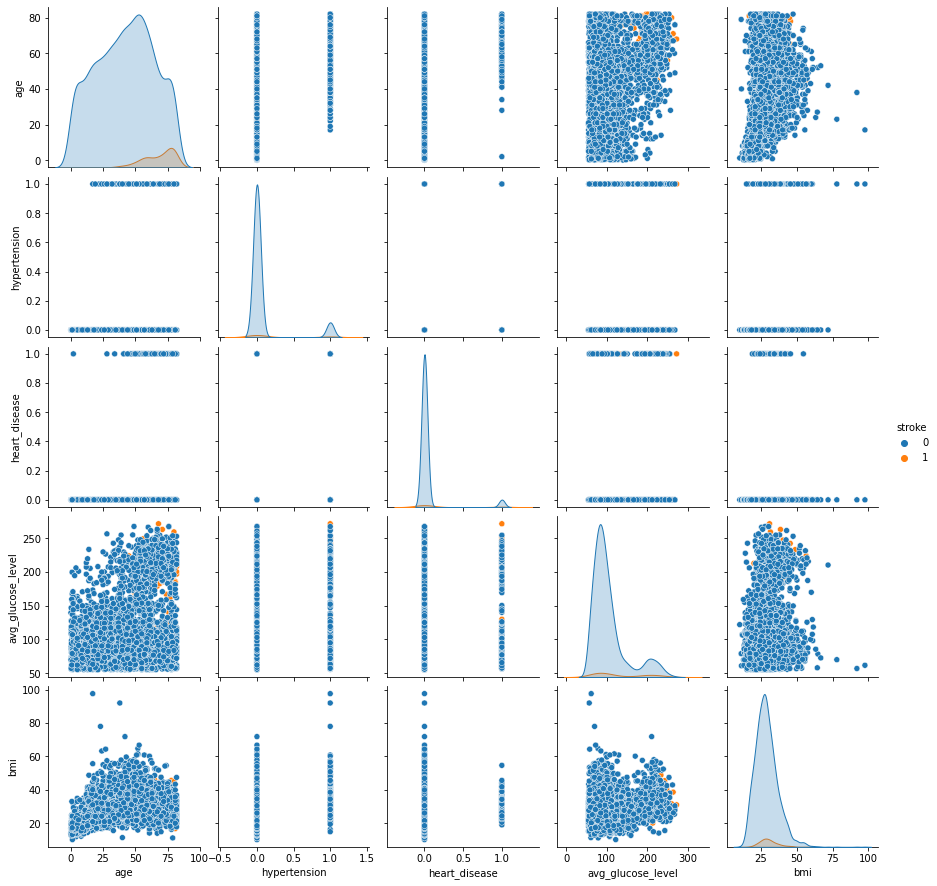

In [12]:
import seaborn as sns
sns.pairplot(df,hue="stroke")

Since this dataset is imbalanced we have to balance it using sampling techniques

In [13]:
# doing one-hot encoding of categorical variables
result_df=pd.get_dummies(result_df,drop_first=True)

In [14]:
result_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,30.471292,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [15]:
result_df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [16]:
x=result_df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes']]
y=result_df['stroke']

### Using SMOTE for oversampling

In [17]:
from imblearn.over_sampling import SMOTE
sampling=SMOTE()
x,y=sampling.fit_resample(x,y)

In [18]:
y.value_counts()

0    4861
1    4861
Name: stroke, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

Since we will use lightGBM which is decision tree based algorithm there is no need to scale values

### Model Building using LightGBM

LightGBM is a gradient boosting model that uses tree-based algorithms. It is much faster than the usual tree-based algorithms like Decision Trees, Random Forests, etc. It has the following advantages over the traditional machine learning algorithms.

* Faster training speed with better efficiency. 
* Lower memory usage.
* Supports GPU processing. 
* Highly scalable and efficiently handles large datasets

In [20]:
import lightgbm as lgb

In [21]:
train_data=lgb.Dataset(x_train,label=y_train)

#### Setting Parameters

In [22]:
param = {'num_leaves':100, 'objective':'binary','max_depth':5,'learning_rate':.05}
param['metric'] = ['auc']

In [23]:
# Training of model
lgbm=lgb.train(param,train_data,5)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3394, number of negative: 3411
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 6805, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498751 -> initscore=-0.004996
[LightGBM] [Info] Start training from score -0.004996
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

### Making Predictions

In [24]:
y_pred=lgbm.predict(x_test)

In [25]:
y_preds=[]
for i in y_pred:
    if i>0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)

### Evaluating Results

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1394
           1       0.87      0.84      0.86      1523

    accuracy                           0.85      2917
   macro avg       0.85      0.86      0.85      2917
weighted avg       0.86      0.85      0.85      2917



<AxesSubplot:>

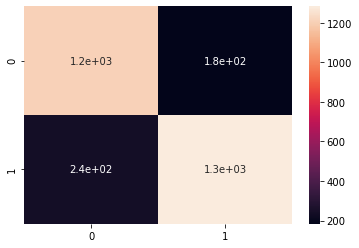

In [27]:
sns.heatmap(confusion_matrix(y_preds,y_test),annot=True)